<a href="https://colab.research.google.com/github/stargazer160/yeardream-2th/blob/main/miniproject_hy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_ver1_210329_210926.csv',encoding='CP949')

In [7]:
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00


In [8]:
data.tail()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15 0:00:00
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10 0:00:00
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15 0:00:00
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10 0:00:00
105418,1365007,610626.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 14:25:47,139000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,169000.0,169000.0,NAVER,POINT,영상 편집,2021-08-17 0:00:00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      105419 non-null  int64  
 1   customer_id             105416 non-null  float64
 2   course_id               100212 non-null  float64
 3   type                    105419 non-null  object 
 4   state                   105419 non-null  object 
 5   course_title            105403 non-null  object 
 6   category_title          105395 non-null  object 
 7   format                  105403 non-null  object 
 8   completed_at            105419 non-null  object 
 9   transaction_amount      105419 non-null  int64  
 10  coupon_title            31817 non-null   object 
 11  coupon_discount_amount  31817 non-null   float64
 12  sale_price              104291 non-null  float64
 13  tax_free_amount         104291 non-null  float64
 14  pg                  

In [11]:
data.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054190e+05,105416.000000,100212.000000,1.054190e+05,3.181700e+04,1.042910e+05,1.042910e+05
mean,1.147054e+06,417248.252742,203868.586327,1.464814e+05,4.972172e+04,1.610808e+05,1.575551e+05
std,1.125898e+05,206414.496648,1534.583331,7.195061e+05,5.624467e+04,3.955298e+05,3.898133e+05
min,5.679930e+05,16.000000,2516.000000,-4.144074e+06,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.048940e+06,256401.000000,203100.000000,8.350000e+04,2.000000e+04,1.090000e+05,1.090000e+05
50%,1.135186e+06,501046.000000,203787.000000,1.175000e+05,2.100000e+04,1.320000e+05,1.320000e+05
75%,1.240472e+06,566595.000000,204775.000000,1.590000e+05,6.915000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,2.000000e+06,9.094000e+07,9.094000e+07


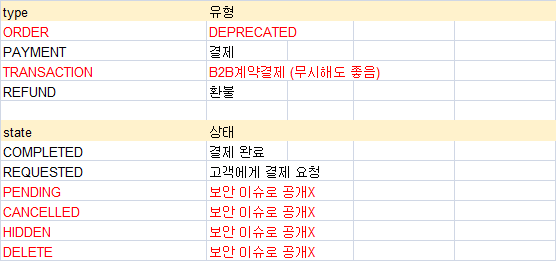

In [12]:
conditions_1 = (data['type'].isin(['ORDER','TRANSACTION']))
df1 = data[conditions_1==False]
df1.head()



,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27 0:00:00
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 0:00:00


In [13]:
conditions_2 = (df1['state'].isin(['COMPLETED','REQUESTED']))
df2 = df1[conditions_2 == True]
df2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27 0:00:00
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 0:00:00


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56738 entries, 2 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      56738 non-null  int64  
 1   customer_id             56738 non-null  float64
 2   course_id               54582 non-null  float64
 3   type                    56738 non-null  object 
 4   state                   56738 non-null  object 
 5   course_title            56737 non-null  object 
 6   category_title          56734 non-null  object 
 7   format                  56737 non-null  object 
 8   completed_at            56738 non-null  object 
 9   transaction_amount      56738 non-null  int64  
 10  coupon_title            23763 non-null  object 
 11  coupon_discount_amount  23763 non-null  float64
 12  sale_price              55658 non-null  float64
 13  tax_free_amount         55658 non-null  float64
 14  pg                      46387 non-nul

In [14]:
name_mapping = {'B2B':'Corporation','B2B 온라인':'Corporation',
'B2G':'Government',
'MBA':'MBA',
'RED':'online lecture',
'관리':'other',
'스쿨':'offline lecture',
'스쿨 온라인':'online lecture',
'아카이브':'online lecture',
'온라인':'online lecture',
'온라인 완주반':'online lecture',
'올인원':'online lecture',
'이벤트':'online lecture',
'캠프':'offline lecture',
'하루10분컷':'online lecture'}

In [17]:
func = lambda x: name_mapping.get(x, x)
df2['format_mapping'] = df2.format.map(func)
df2
#df2.to_excel('/content/drive/MyDrive/minipro5.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,format_mapping
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00,online lecture
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00,online lecture
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00,online lecture
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27 0:00:00,online lecture
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 0:00:00,online lecture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23 0:00:00,online lecture
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02 0:00:00,online lecture
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31 0:00:00,online lecture
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15 0:00:00,online lecture


In [18]:
df2.pivot_table(values="transaction_amount",index="format_mapping",aggfunc="sum")
df3 = df2.pivot_table(values="transaction_amount",index="format_mapping",aggfunc="sum")
transaction_sum = sum(df3['transaction_amount'])
df3['proportion(%)']= round(df3['transaction_amount']/transaction_sum*100,2)
df3




,transaction_amount,proportion(%)
format_mapping,,
Corporation,1981496109,24.76
Government,28921300,0.36
MBA,4970000,0.06
offline lecture,17786154,0.22
online lecture,5970783594,74.60
other,150000,0.00


In [19]:
lables1 = df3.index.tolist()
lables1

['Corporation',
 'Government',
 'MBA',
 'offline lecture',
 'online lecture',
 'other']

In [20]:
ratio1 = df3['transaction_amount'].tolist()
ratio1

[1981496109, 28921300, 4970000, 17786154, 5970783594, 150000]

1. 우리의 고객은 누구인가 ? 전체 매출중 74.6% 가 온라인 강의 판매, 약 24.8% 이 기업강의(정부,공공기관 포함)이다.

*설명:
https://www.etoday.co.kr/news/view/2099487
기사를 보니 기업매출도 중시하는 것 같아서, 온 오프라인으로 구분하지 않고 기업, 온라인 교육으로 구분하였습니다.  

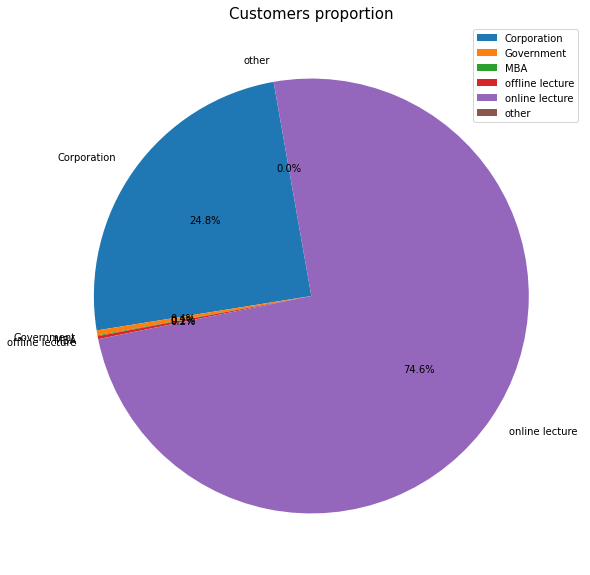

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pie(ratio1,labels=lables1,autopct='%.1f%%', startangle=100)
plt.legend() ## 범례 표시
plt.title("Customers proportion", fontsize=15)
plt.show()


#temp_series = order_products_prior_df['department'].value_counts()
#labels = (np.array(temp_series.index))
#sizes = (np.array((temp_series / temp_series.sum())*100))
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)


2. 가격할인(쿠폰)의 효과는? 


In [23]:
df4=df2.pivot_table(values=["transaction_amount","coupon_discount_amount","sale_price"],index="coupon_title",aggfunc="sum")
df4.sort_values(by="transaction_amount",ascending=False).head(20)

,coupon_discount_amount,sale_price,transaction_amount
coupon_title,,,
[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,77300000.0,460045900.0,382745900
[WELCOME] 온라인 강의 3만원 할인쿠폰,64290000.0,403426200.0,339136200
[WELCOME] 온라인 강의 2만원 할인쿠폰,33120000.0,227338000.0,194218000
[WELCOME] 온라인 강의 1만원 할인쿠폰,13350000.0,183072200.0,169729200
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,17910000.0,171234800.0,153332700
[미래투자금] 온라인 강의 2만원 할인쿠폰,16720000.0,161100000.0,144380000
[웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰,15621350.0,156213500.0,140592150
[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰,25860000.0,154521900.0,128661900
[20% 할인] 완주반 1주년 기념 쿠폰,14589800.0,72949000.0,58359200


2. 패스트 캠퍼스 마케팅 관련 내용 
https://brunch.co.kr/@day1companyhr/24
3. 패스트 캠퍼스 사업소개(패캠 홈피)
https://groovy-character-ecc.notion.site/Fast-Campus-088260d20b6e4db3b3a22698027e09be

여러분이 생각해봐야 할 기본적인 상황입니다.

- 패스트캠퍼스의 비즈니스 모델은 어떻게 될까요?
- 사람들은 패스트캠퍼스의 강의를 어떻게 알게 될까요?
- 패스트캠퍼스에서 강의를 결제하는 과정은 어떻게 될까요?
- 유저들이 강의를 구매하는 과정을 어떻게 기록할까요?
- 결제가 된 내역은 어떻게 관리할까요?

**제안하는 주제들은 다음과 같습니다.**

1. EDA : 강의 구매내역을 가지고 마케팅팀과 콘텐츠 기획팀이 어떤 방향으로 강의를 제작할 수 있을지 아이디어를 제공해주세요.
2. 고객군 분석 : 패스트캠퍼스에서 강의를 구매하는 사람들은 어떤 그룹으로 분류될지 고민해보세요. 그룹으로 나뉘게 된다면, 해당 그룹은 어떤 특징을 가지고 있나요?
3. 구매 내역 분석 : 사람들은 어떤 강의를 많이 구매할까요? 사람들의 구매 패턴을 파악해보고, 마케팅이 효과가 있었는지 특정 그룹에게 해당 상품이 효과가 있는지 등을 파악해보세요.

- 소소한 프로젝트 진행 Tip.
    - kaggle에서 거래 내역을 기반으로 분석한 EDA notebook들을 살펴보세요.
    - 최대한 많은 그래프를 그려보세요.
    - 최대한 다양한 통계량을 계산해보세요.
    - 내가 진짜 회사에서 Data Scientist라면? 내가 Performance Marketer라면? 실제 액션 플랜을 상상해보세요.
    - 프로젝트의 목적에 대해서 생각해보세요. 데이터 분석 라이브러리 연습을 많이 하고 싶은지, 분석 인사이트를 키우고 싶은지.